In [152]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler


import os

%matplotlib inline

In [105]:
# LOADING AND UNDERSTANDING

dataset = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
dataset

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [106]:
# DATA UNDESTANDING:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
title                           1573 non-null object
title_orig                      1573 non-null object
price                           1573 non-null float64
retail_price                    1573 non-null int64
currency_buyer                  1573 non-null object
units_sold                      1573 non-null int64
uses_ad_boosts                  1573 non-null int64
rating                          1573 non-null float64
rating_count                    1573 non-null int64
rating_five_count               1528 non-null float64
rating_four_count               1528 non-null float64
rating_three_count              1528 non-null float64
rating_two_count                1528 non-null float64
rating_one_count                1528 non-null float64
badges_count                    1573 non-null int64
badge_local_product             1573 non-null int64
badge_product_quality           1573 non-nul

In [107]:
dataset.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [108]:
# DROP CLOMUNS:

dataset.drop( labels = [ 'origin_country','theme', 'crawl_month', 'title_orig', 'product_url',
                       'product_picture','product_id','merchant_id','merchant_info_subtitle','merchant_name','merchant_title',
                       'shipping_option_name','urgency_text'], axis=1, inplace = True)
dataset.drop(labels = ['title','merchant_has_profile_picture','currency_buyer','product_color',
                       'product_variation_size_id'], axis=1, inplace = True)

In [242]:
# LOAD INFO:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 25 columns):
price                          1573 non-null float64
retail_price                   1573 non-null int64
units_sold                     1573 non-null int64
uses_ad_boosts                 1573 non-null int64
rating                         1573 non-null float64
rating_count                   1573 non-null int64
rating_five_count              1528 non-null float64
rating_four_count              1528 non-null float64
rating_three_count             1528 non-null float64
rating_two_count               1528 non-null float64
rating_one_count               1528 non-null float64
badges_count                   1573 non-null int64
badge_local_product            1573 non-null int64
badge_product_quality          1573 non-null int64
badge_fast_shipping            1573 non-null int64
tags                           1573 non-null object
product_variation_inventory    1573 non-null int64
shipping_op

In [109]:
# IS NULL

dataset.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
rating_five_count                45
rating_four_count                45
rating_three_count               45
rating_two_count                 45
rating_one_count                 45
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_variation_inventory       0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1100
merchant_rating_count             0
merchant_rating                   0
merchant_profile_picture       1347
dtype: int64

In [110]:
# REPLACE 

dataset[ 'rating_five_count']. replace(np.nan,0, inplace = True)
dataset[ 'rating_four_count']. replace(np.nan,0, inplace = True)
dataset[ 'rating_three_count']. replace(np.nan,0, inplace = True)
dataset[ 'rating_two_count']. replace(np.nan,0, inplace = True)
dataset[ 'rating_one_count']. replace(np.nan,0, inplace = True)
dataset[ 'has_urgency_banner']. replace(np.nan,0, inplace = True)

dataset['merchant_profile_picture']. replace(np.nan, 0, inplace = True)


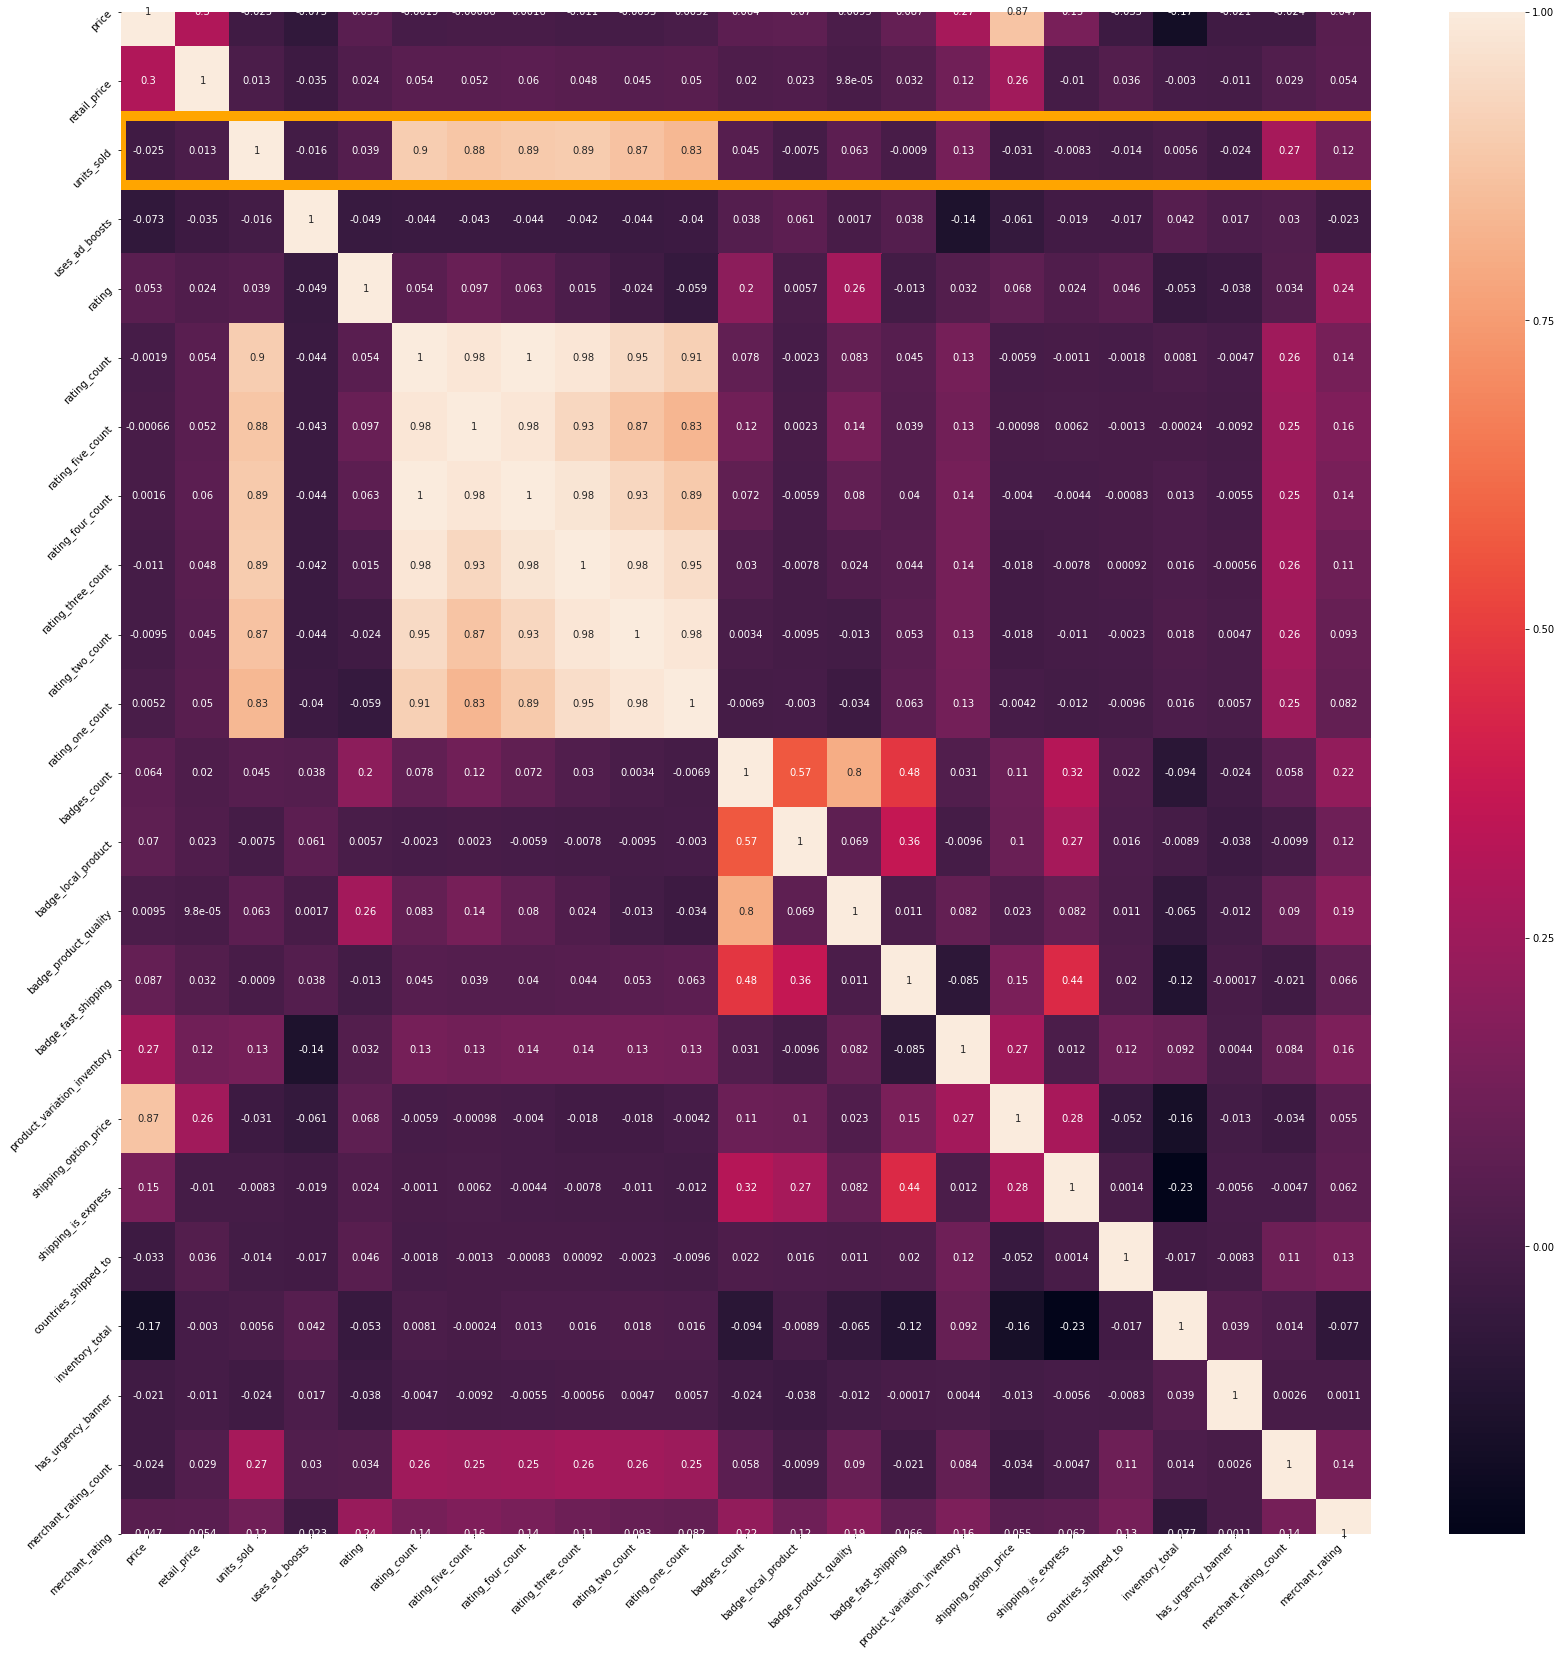

In [111]:
# CORRELATION MATRIX:


fig_dims = (28, 28)
fig, ax = plt.subplots( figsize = fig_dims )
sns.heatmap(dataset.corr(),
    annot = True,
    ax = ax)
ax.add_patch(plt.Rectangle ((0,2), 35,1,
            fill = False,
            edgecolor = 'Orange',
            lw =10))
plt.xticks(rotation = 45, ha='right')
plt.yticks(rotation = 45, ha='right')
plt.show()


In [11]:
# HOW CHOOSING ATTRIBUTES FOR CLUSTERING

dataset.iloc[:,[2,4,5]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 3 columns):
units_sold      1573 non-null int64
rating          1573 non-null float64
rating_count    1573 non-null int64
dtypes: float64(1), int64(2)
memory usage: 37.0 KB


In [112]:
indexNames = dataset[dataset['rating_count']== 0]. index
indexNames

Int64Index([  74,  112,  126,  189,  216,  248,  309,  346,  348,  375,  438,
             447,  481,  487,  555,  597,  618,  634,  670,  732,  746,  774,
             781,  864,  865,  904,  959,  976, 1094, 1117, 1127, 1148, 1156,
            1186, 1190, 1192, 1242, 1245, 1270, 1292, 1355, 1468, 1481, 1488,
            1532],
           dtype='int64')

In [13]:
dataset.drop(indexNames, inplace = True)

In [113]:
# ENCODING VALUES:

In [114]:
# -- FIRST -   UNIT_SOLD:

cond = [ (dataset[ 'units_sold'] <= 999),
         (dataset[ 'units_sold'] >= 1000) & (dataset['units_sold'] <= 9999),
         (dataset[ 'units_sold'] >=10000), ]

values = [0,1,2]

dataset['units_sold_en'] = np.select(cond, values)


In [115]:
# -- TWO  -  RATING:

cond = [ ( dataset ['rating'] < 3),
          (dataset ['rating'] >= 3) & (dataset)['rating'] < 4,
          (dataset ['rating'] >= 4), ]

values = [0,1,2]

dataset['rating_en'] = np.select(cond, values)

In [116]:
# -- THREE  -  RATING_COUNT:

cond = [ ( dataset ['rating_count'] < 100),
          (dataset ['rating_count'] >= 100) & (dataset)['rating'] < 1000,
          (dataset ['rating_count'] >= 1000), ]

values = [0,1,2]

dataset['rating_count_en'] = np.select(cond, values)

In [117]:
# RESULT:

dataset.iloc[:,[2,4,5]]

,units_sold,rating,rating_count
0,100,3.76,54
1,20000,3.45,6135
2,100,3.57,14
3,5000,4.03,579
4,100,3.10,20
...,...,...,...
1568,10000,4.08,1367
1569,100,3.07,28
1570,100,3.71,59
1571,100,2.50,2


In [ ]:
# DATA CLEANING FOR ENCODED DATASET

In [118]:
# 1 - find missing values 

dataset.columns [dataset.isna( ).any( )].tolist()
# no missing values are found

[]

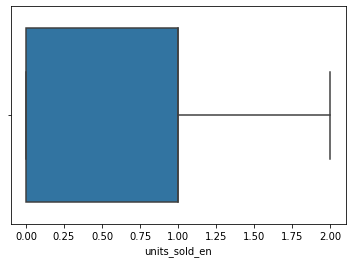

In [20]:
# 2 - find outlers

sns.boxplot(x = dataset['units_sold_en'])

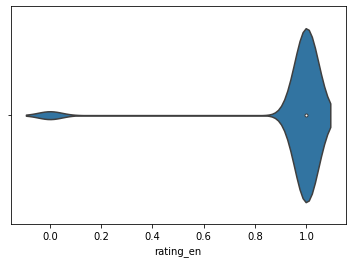

In [119]:
sns.violinplot( x = dataset['rating_en'])

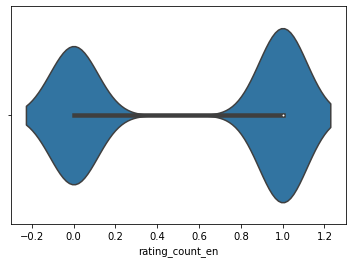

In [120]:
sns.violinplot(x = dataset['rating_count_en'])

# no outliers are found

In [ ]:
# DATA TRANSFORMATION FOR ENCODES DATASET

In [121]:
# Scaling using Standard Scaler

ss = MinMaxScaler()
ss_dataset = ss.fit_transform(dataset.iloc [0:,[25,26,27]] ) # 25 - unit_sold, 26 - rating, 27 -ratings_count  
ss_dataset

array([[0., 1., 0.],
       [1., 1., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.]])

In [ ]:
# MODELLING K-means Clustering

In [122]:
# Finding K value
sse = []

In [123]:
for i in range (1,11):
    KM = KMeans( n_clusters = 1 )
    KM.fit(ss_dataset)
    sse.append(KM.inertia_)

In [235]:
sse

[650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063,
 650.3920157068063]

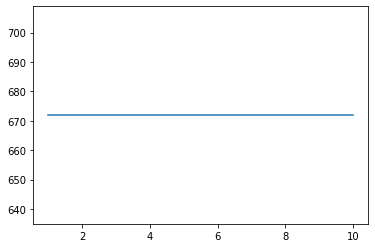

In [124]:
plt.plot(range(1,11), sse)

In [125]:
# LAST VISUALIZATION

k_means = KMeans(n_clusters = 4)
k_means.fit(ss_dataset)
cluster = k_means.labels_

In [126]:
dataset['product_success'] = cluster

In [127]:
dataset['product_success']

0       0
1       2
2       0
3       1
4       0
       ..
1568    2
1569    0
1570    0
1571    3
1572    0
Name: product_success, Length: 1573, dtype: int32

In [190]:
dataset.groupby('product_success')[['units_sold','rating','rating_count']].describe().T

product_success               0            1              2           3
units_sold   count   574.000000   592.000000     303.000000   59.000000
             mean   2469.163763   205.788851   17425.742574   80.881356
             std    1975.276594   354.882814   15158.334233   33.409210
             min     100.000000     7.000000   10000.000000    2.000000
             25%    1000.000000   100.000000   10000.000000   50.000000
             50%    1000.000000   100.000000   10000.000000  100.000000
             75%    5000.000000   100.000000   20000.000000  100.000000
             max    5000.000000  5000.000000  100000.000000  100.000000
rating       count   574.000000   592.000000     303.000000   59.000000
             mean      3.830453     3.822584       3.886205    2.476271
             std       0.340944     0.487614       0.290189    0.498224
             min       2.750000     3.000000       2.930000    1.000000
             25%       3.610000     3.470000       3.700000    2.290000
             50%       3.880000     3.790000       3.920000    2.670000
             75%       4.090000     4.110000       4.105000    2.810000
             max       4.640000     5.000000       4.480000    2.920000
rating_count count   574.000000   592.000000     303.000000   59.000000
             mean    525.013937    30.638514    3561.590759   13.152542
             std     401.633167    25.322376    3324.216742   17.809155
             min     100.000000     1.000000     397.000000    1.000000
             25%     200.000000    10.000000    1621.500000    3.000000
             50%     429.000000    24.000000    2441.000000    7.000000
             75%     755.500000    49.000000    3887.000000   16.500000
             max    2737.000000    99.000000   20744.000000   82.000000

In [145]:
labels = k_means.labels_
centroids = k_means.cluster_centers_

In [153]:
trace1 = go.Scatter3d (
    x = dataset ['units_sold'],
    y = dataset ['rating'],
    z = dataset ['rating_count'],
    mode = 'markers',
    marker = dict(
    color = dataset ['product_success'],
    siza = 10,
    line=dict(
        color= df['product_success'],
        width=12 ),
        
        opacity = 0.7
    )
)
    
df1 = [trace1]
    
layout = go.layout(
   title = 'Character vc Gender vc Alive our not',
   margin= dict(
       l = 0,
       r = 0,
       b = 0,
       t = 0 
    ),
    
    scene = dict(
        xaxis = dict(title = 'units_sold'),
        yaxis = dict(title = 'rating'),
        zaxis = dict(title = 'rating_count')
    )
)
    
fig = go.Figure(data = df1, layout = layout)
py.iplot(fig)

NameError: name 'go' is not defined

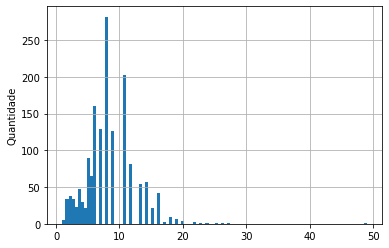

In [130]:
dataset.price.hist( bins = 100)
plt.xlabel('')
plt.ylabel('Quantidade')
plt.show()

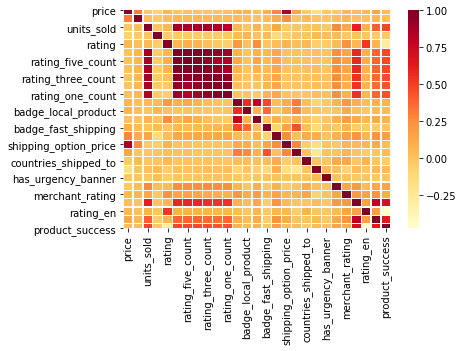

In [131]:
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd",linewidths = 0.2)
plt.show()

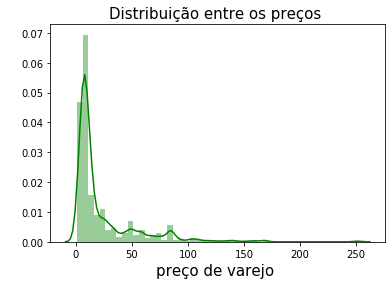

In [132]:
sns.distplot(dataset['retail_price'], color = 'green')
plt.title('Distribuição entre os preços ',fontsize = 15)
plt.xlabel('preço de varejo ',fontsize=15)
plt.ylabel(' ')
plt.show()